In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

al = pd.read_csv('S:/Hackathons/EY/results/scaled_dist_data.csv')

In [2]:
al.head(5)

,state,District_Key,confirmed,active,recovered,deceased,migrated_other,density,urbans,full_immunes,elderlies,hh_more_than_4,cold_chain_points,storage_cap_lits
0,Andaman and Nicobar Islands,AN_Nicobar,0.000000,0.000704,0.000000,0.000000,0,0.000504,0.002414,0.003897,0.001921,0.001865,0.006166,0.006166
1,Andaman and Nicobar Islands,AN_North and Middle Andaman,0.000004,0.000704,0.000004,0.000000,0,0.000721,0.007598,0.011429,0.006130,0.006770,0.022285,0.022285
2,Andaman and Nicobar Islands,AN_South Andaman,0.000200,0.001076,0.000130,0.000000,0,0.002323,0.017593,0.025948,0.014243,0.016226,0.053358,0.053358
3,Andhra Pradesh,AP_Anantapur,0.263420,0.003618,0.270190,0.081284,0,0.005595,0.272112,0.356739,0.365251,0.294924,0.351934,0.351934
4,Andhra Pradesh,AP_Chittoor,0.335082,0.009545,0.342299,0.114344,0,0.007221,0.277927,0.364356,0.373053,0.301235,0.359499,0.359499


In [3]:
al.columns

Index(['state', 'District_Key', 'confirmed', 'active', 'recovered', 'deceased',
       'migrated_other', 'density', 'urbans', 'full_immunes', 'elderlies',
       'hh_more_than_4', 'cold_chain_points', 'storage_cap_lits'],
      dtype='object')

In [4]:
cluster_data = al[['active', 'density', 'urbans', 'full_immunes', 'elderlies','hh_more_than_4', 'cold_chain_points',
                   'storage_cap_lits']]
cluster_data.head()

,active,density,urbans,full_immunes,elderlies,hh_more_than_4,cold_chain_points,storage_cap_lits
0,0.000704,0.000504,0.002414,0.003897,0.001921,0.001865,0.006166,0.006166
1,0.000704,0.000721,0.007598,0.011429,0.006130,0.006770,0.022285,0.022285
2,0.001076,0.002323,0.017593,0.025948,0.014243,0.016226,0.053358,0.053358
3,0.003618,0.005595,0.272112,0.356739,0.365251,0.294924,0.351934,0.351934
4,0.009545,0.007221,0.277927,0.364356,0.373053,0.301235,0.359499,0.359499


In [5]:
cluster_data['full_immunes']  = 1-cluster_data['full_immunes'] 
cluster_data['cold_chain_points']  = 1-cluster_data['cold_chain_points'] 
cluster_data['storage_cap_lits']  = 1-cluster_data['storage_cap_lits'] 

<ipython-input-5-8ff59b69306f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['full_immunes']  = 1-cluster_data['full_immunes']
<ipython-input-5-8ff59b69306f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['cold_chain_points']  = 1-cluster_data['cold_chain_points']
<ipython-input-5-8ff59b69306f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [6]:
dis = al['District_Key'].apply(lambda x : x[3:])
cluster_data['district'] = dis
cluster_data['state'] = al['state']

<ipython-input-6-d95262f320d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['district'] = dis
<ipython-input-6-d95262f320d7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['state'] = al['state']


In [7]:
cluster_data.head()

,active,density,urbans,full_immunes,elderlies,hh_more_than_4,cold_chain_points,storage_cap_lits,district,state
0,0.000704,0.000504,0.002414,0.996103,0.001921,0.001865,0.993834,0.993834,Nicobar,Andaman and Nicobar Islands
1,0.000704,0.000721,0.007598,0.988571,0.006130,0.006770,0.977715,0.977715,North and Middle Andaman,Andaman and Nicobar Islands
2,0.001076,0.002323,0.017593,0.974052,0.014243,0.016226,0.946642,0.946642,South Andaman,Andaman and Nicobar Islands
3,0.003618,0.005595,0.272112,0.643261,0.365251,0.294924,0.648066,0.648066,Anantapur,Andhra Pradesh
4,0.009545,0.007221,0.277927,0.635644,0.373053,0.301235,0.640501,0.640501,Chittoor,Andhra Pradesh


In [8]:
cluster_data.to_csv('S:/Hackathons/EY/results/indexed.csv',index = False)

In [9]:
cluster_data.head()

,active,density,urbans,full_immunes,elderlies,hh_more_than_4,cold_chain_points,storage_cap_lits,district,state
0,0.000704,0.000504,0.002414,0.996103,0.001921,0.001865,0.993834,0.993834,Nicobar,Andaman and Nicobar Islands
1,0.000704,0.000721,0.007598,0.988571,0.006130,0.006770,0.977715,0.977715,North and Middle Andaman,Andaman and Nicobar Islands
2,0.001076,0.002323,0.017593,0.974052,0.014243,0.016226,0.946642,0.946642,South Andaman,Andaman and Nicobar Islands
3,0.003618,0.005595,0.272112,0.643261,0.365251,0.294924,0.648066,0.648066,Anantapur,Andhra Pradesh
4,0.009545,0.007221,0.277927,0.635644,0.373053,0.301235,0.640501,0.640501,Chittoor,Andhra Pradesh


In [10]:
cluster_data['index'] = np.power(cluster_data['density']*cluster_data['urbans']*cluster_data['full_immunes']*cluster_data['elderlies']*cluster_data['hh_more_than_4']*cluster_data['cold_chain_points']*cluster_data['storage_cap_lits'],1/7)

<ipython-input-10-59b5e749f4fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['index'] = np.power(cluster_data['density']*cluster_data['urbans']*cluster_data['full_immunes']*cluster_data['elderlies']*cluster_data['hh_more_than_4']*cluster_data['cold_chain_points']*cluster_data['storage_cap_lits'],1/7)


In [11]:
cluster_data.head()

,active,density,urbans,full_immunes,elderlies,hh_more_than_4,cold_chain_points,storage_cap_lits,district,state,index
0,0.000704,0.000504,0.002414,0.996103,0.001921,0.001865,0.993834,0.993834,Nicobar,Andaman and Nicobar Islands,0.023769
1,0.000704,0.000721,0.007598,0.988571,0.006130,0.006770,0.977715,0.977715,North and Middle Andaman,Andaman and Nicobar Islands,0.041579
2,0.001076,0.002323,0.017593,0.974052,0.014243,0.016226,0.946642,0.946642,South Andaman,Andaman and Nicobar Islands,0.070010
3,0.003618,0.005595,0.272112,0.643261,0.365251,0.294924,0.648066,0.648066,Anantapur,Andhra Pradesh,0.238819
4,0.009545,0.007221,0.277927,0.635644,0.373053,0.301235,0.640501,0.640501,Chittoor,Andhra Pradesh,0.248680


In [24]:
! pip install pyclustertend 

# hopkins Test

In [14]:
X = cluster_data.drop(columns = ['district','state'])
from pyclustertend import hopkins
hopkins(X, X.shape[0])

0.031905101622537575

In [15]:
cluster_data.head()

,active,density,urbans,full_immunes,elderlies,hh_more_than_4,cold_chain_points,storage_cap_lits,district,state,index
0,0.000704,0.000504,0.002414,0.996103,0.001921,0.001865,0.993834,0.993834,Nicobar,Andaman and Nicobar Islands,0.023769
1,0.000704,0.000721,0.007598,0.988571,0.006130,0.006770,0.977715,0.977715,North and Middle Andaman,Andaman and Nicobar Islands,0.041579
2,0.001076,0.002323,0.017593,0.974052,0.014243,0.016226,0.946642,0.946642,South Andaman,Andaman and Nicobar Islands,0.070010
3,0.003618,0.005595,0.272112,0.643261,0.365251,0.294924,0.648066,0.648066,Anantapur,Andhra Pradesh,0.238819
4,0.009545,0.007221,0.277927,0.635644,0.373053,0.301235,0.640501,0.640501,Chittoor,Andhra Pradesh,0.248680


# K-means Elbow

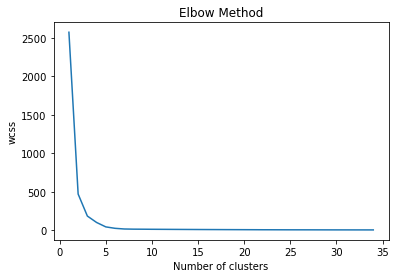

In [43]:


X = cluster_data.drop(columns = ['district','state'])
X = X.values
from sklearn.cluster import KMeans
wcss = []
for i in range(1,35):
    km = KMeans(n_clusters = i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,35),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()


In [23]:
km7=KMeans(n_clusters=7,init='k-means++', max_iter=300, n_init=10, random_state=0)
k_means = km7.fit(X)


In [24]:
k_means.labels_

array([1, 1, 1, 0, 0, 0, 0, 6, 0, 0, 6, 6, 6, 0, 6, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1,
       1, 1, 4, 4, 1, 1, 1, 1, 4, 4, 4, 1, 4, 1, 1, 1, 1, 6, 1, 4, 1, 4,
       4, 1, 1, 2, 1, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 4, 1, 4, 2, 4, 4, 1,
       4, 2, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 1, 1, 2, 2, 4, 2, 2, 4, 1, 4,
       1, 4, 1, 1, 4, 1, 1, 6, 1, 1, 4, 1, 1, 1, 4, 1, 4, 1, 1, 4, 0, 4,
       1, 1, 1, 1, 1, 4, 4, 1, 3, 4, 6, 4, 6, 4, 6, 1, 4, 6, 1, 1, 4, 4,
       6, 6, 6, 6, 4, 6, 4, 1, 4, 6, 4, 1, 6, 6, 0, 4, 1, 0, 4, 4, 4, 1,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4,
       1, 1, 1, 4, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 4, 1, 1, 1, 4, 1, 1, 1,
       1, 1, 1, 1, 4, 1, 4, 1, 4, 2, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1,
       4, 1, 2, 4, 4, 1, 4, 6, 6, 0, 4, 3, 6, 6, 4, 4, 4, 6, 6, 6, 6, 4,
       6, 6, 4, 1, 4, 4, 6, 6, 6, 4, 6, 6, 4, 4, 4, 6, 0, 4, 6, 4, 6, 6,
       0, 0, 6, 4, 0, 0, 4, 1, 1, 1, 1, 4, 4, 4, 4,

In [25]:
cluster_data['cluster'] = k_means.labels_
cluster_data.head(5)

<ipython-input-25-c9c00c9fdffe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['cluster'] = k_means.labels_


,active,density,urbans,full_immunes,elderlies,hh_more_than_4,cold_chain_points,storage_cap_lits,district,state,index,cluster
0,0.000704,0.000504,0.002414,0.996103,0.001921,0.001865,0.993834,0.993834,Nicobar,Andaman and Nicobar Islands,0.023769,1
1,0.000704,0.000721,0.007598,0.988571,0.006130,0.006770,0.977715,0.977715,North and Middle Andaman,Andaman and Nicobar Islands,0.041579,1
2,0.001076,0.002323,0.017593,0.974052,0.014243,0.016226,0.946642,0.946642,South Andaman,Andaman and Nicobar Islands,0.070010,1
3,0.003618,0.005595,0.272112,0.643261,0.365251,0.294924,0.648066,0.648066,Anantapur,Andhra Pradesh,0.238819,0
4,0.009545,0.007221,0.277927,0.635644,0.373053,0.301235,0.640501,0.640501,Chittoor,Andhra Pradesh,0.248680,0


In [49]:
X[1]

array([7.04105981e-04, 7.21010313e-04, 7.59818116e-03, 9.88571033e-01,
       6.12959817e-03, 6.77008541e-03, 9.77715049e-01, 9.77715049e-01,
       4.15788834e-02, 1.00000000e+00])

In [26]:
cluster_data['cluster'] = k_means.labels_
cluster_data.head(5)

<ipython-input-26-c9c00c9fdffe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['cluster'] = k_means.labels_


,active,density,urbans,full_immunes,elderlies,hh_more_than_4,cold_chain_points,storage_cap_lits,district,state,index,cluster
0,0.000704,0.000504,0.002414,0.996103,0.001921,0.001865,0.993834,0.993834,Nicobar,Andaman and Nicobar Islands,0.023769,1
1,0.000704,0.000721,0.007598,0.988571,0.006130,0.006770,0.977715,0.977715,North and Middle Andaman,Andaman and Nicobar Islands,0.041579,1
2,0.001076,0.002323,0.017593,0.974052,0.014243,0.016226,0.946642,0.946642,South Andaman,Andaman and Nicobar Islands,0.070010,1
3,0.003618,0.005595,0.272112,0.643261,0.365251,0.294924,0.648066,0.648066,Anantapur,Andhra Pradesh,0.238819,0
4,0.009545,0.007221,0.277927,0.635644,0.373053,0.301235,0.640501,0.640501,Chittoor,Andhra Pradesh,0.248680,0
